# ACTIVATION FUNCTION

In [63]:
%matplotlib inline
import matplotlib.pyplot as  plt
import numpy as np
from math import exp
import pandas as pd
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from numpy.random import randint

In [2]:
testlist=np.arange(-10,10,0.1)

In [3]:
l=len(testlist)

### Step Function

Function based on condition

In [4]:
def step(x):
    if x<0:
        return  -1
    else:
        return 1

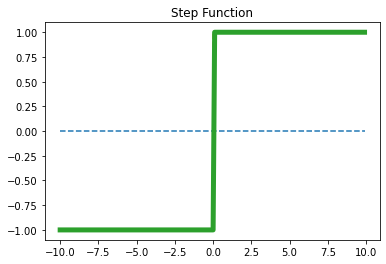

In [5]:
plt.plot(testlist,[0]*l,linestyle='dashed')
plt.plot([0]*l,[step(x) for x in testlist],linestyle='dashed')
plt.plot(testlist,[step(x) for x in testlist],linewidth=5)
plt.title('Step Function')
plt.show()

### Sigmoid Function

In [6]:
def sigmoid(x):
    return 1/(1 +  exp(-x))

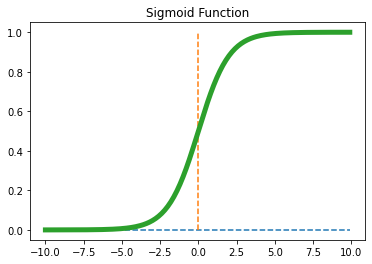

In [7]:
plt.plot(testlist,[0]*l,linestyle='dashed')
plt.plot([0]*l,[sigmoid(x) for x in testlist],linestyle='dashed')
plt.plot(testlist,[sigmoid(x) for x in testlist],linewidth=5)
plt.title('Sigmoid Function')
plt.show()

## tanh

In [8]:
def tanh(x):
    return (exp(x)-exp(-x))/(exp(x)+exp(-x))

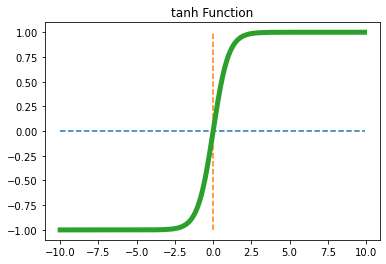

In [9]:
plt.plot(testlist,[0]*l,linestyle='dashed')
plt.plot([0]*l,[tanh(x) for x in testlist],linestyle='dashed')
plt.plot(testlist,[tanh(x) for x in testlist],linewidth=5)
plt.title('tanh Function')
plt.show()

## ReLU

In [10]:
def relu(x):
    return max(0,x)

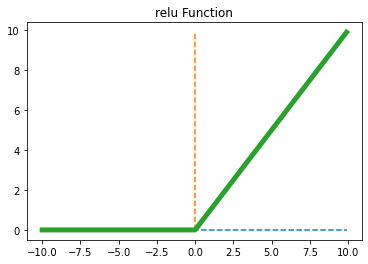

In [11]:

plt.plot(testlist,[0]*l,linestyle='dashed')
plt.plot([0]*l,[relu(x) for x in testlist],linestyle='dashed')
plt.plot(testlist,[relu(x) for x in testlist],linewidth=5)
plt.title('relu Function')
plt.show()

## Leaky ReLU

In [12]:
def leaky_relu(x):
    return max(0.1*x,x)

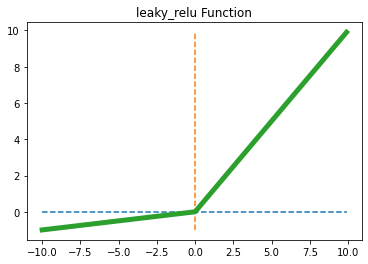

In [13]:
plt.plot(testlist,[0]*l,linestyle='dashed')
plt.plot([0]*l,[leaky_relu(x) for x in testlist],linestyle='dashed')
plt.plot(testlist,[leaky_relu(x) for x in testlist],linewidth=5)
plt.title('leaky_relu Function')
plt.show()

## Conclusion

sigmoid is used mostly in output layer when output is binary

tanh is used in hidden layer

Relu is used in Hidden layers if not sure about which function to choose

sigmoid ,tanh ,relu has vanishing gradient problem (learning rate becoming slower when derivative approaches to zero)

 
 # LOSS FUNCTION

## Mean Absolute Error

In [14]:
y_true=np.array([2,5,7,9,10,11,15])
y_predicted=np.array([15,26,37,43,56,68,74])

In [15]:
def mean_abs_error(true,predicted):
    return np.mean(np.abs(true-predicted))

mean_abs_error(y_true,y_predicted)

37.142857142857146

## Mean Square Error

In [16]:
def mean_sqr_error(true,predicted):
    return np.mean((true-predicted)**2)

mean_sqr_error(y_true,y_predicted)

1644.5714285714287

## Log Loss OR Binary Crossentropy

Used as loss function for logistic regression (binary target)

In [17]:
y_true2=np.array([1,0,0,1,1,0,1])
y_predicted2=np.array([1,1,0,1,1,0,0])

In [18]:
def log_loss(true,predicted):
    true=true.astype(np.float64,copy=False)
    predicted=predicted.astype(np.float64,copy=False)
    epsilon=1e-15
    predicted[predicted==0]=epsilon
    predicted[predicted==1]=1-epsilon
    return -np.mean(true*np.log(predicted)+(1-true)*np.log(1-predicted))
    
    
log_loss(y_true2,y_predicted2)

9.86833605532165

## GREDIENT DESENT for classification

In [19]:
df1=pd.read_csv('../resources/Excel_sheets/insurance_data.csv')
df1.head(2)

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0


In [20]:
df=df1.copy()

df['age']=df['age']/100
df.head(2)

,age,affordibility,bought_insurance
0,0.22,1,0
1,0.25,0,0


In [21]:
X_train,X_test,y_train,y_test=train_test_split(df[['age','affordibility']],df.bought_insurance,
                                              test_size=0.2,random_state=10)

In [22]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',
                      bias_initializer='zeros')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5000)

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 0.7311 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7306 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7302 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7298 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.7293 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7289 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7285 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7281 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.7276 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7272 - accuracy: 0.5000
Epoch 11/5000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 166/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.5000
Epoch 167/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6740 - accuracy: 0.5000
Epoch 168/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6738 - accuracy: 0.5000
Epoch 169/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6735 - accuracy: 0.5000
Epoch 170/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6733 - accuracy: 0.5000
Epoch 171/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6730 - accuracy: 0.5000
Epoch 172/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.5455
Epoch 173/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6725 - accuracy: 0.5455
Epoch 174/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.5455
Epoch 175/5000
1/

1/1 [==============================] - 0s 8ms/step - loss: 0.6568 - accuracy: 0.5909
Epoch 248/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.5909
Epoch 249/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6564 - accuracy: 0.5909
Epoch 250/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6563 - accuracy: 0.5909
Epoch 251/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6561 - accuracy: 0.5909
Epoch 252/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6559 - accuracy: 0.5909
Epoch 253/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6557 - accuracy: 0.5909
Epoch 254/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6555 - accuracy: 0.5909
Epoch 255/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6554 - accuracy: 0.5909
Epoch 256/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6552 - accuracy: 0.5909
Epoch 257/5000
1

1/1 [==============================] - 0s 0s/step - loss: 0.6445 - accuracy: 0.5909
Epoch 330/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6444 - accuracy: 0.5909
Epoch 331/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6443 - accuracy: 0.5909
Epoch 332/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6442 - accuracy: 0.5909
Epoch 333/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6440 - accuracy: 0.5909
Epoch 334/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6439 - accuracy: 0.5909
Epoch 335/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6438 - accuracy: 0.5909
Epoch 336/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6437 - accuracy: 0.5909
Epoch 337/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6436 - accuracy: 0.5909
Epoch 338/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6434 - accuracy: 0.5909
Epoch 339/5000
1

1/1 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.5909
Epoch 412/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6361 - accuracy: 0.5909
Epoch 413/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6360 - accuracy: 0.5909
Epoch 414/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6360 - accuracy: 0.5909
Epoch 415/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6359 - accuracy: 0.5909
Epoch 416/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.5909
Epoch 417/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6357 - accuracy: 0.5909
Epoch 418/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6356 - accuracy: 0.5909
Epoch 419/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6356 - accuracy: 0.5909
Epoch 420/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6355 - accuracy: 0.5909
Epoch 421/5000

1/1 [==============================] - 0s 8ms/step - loss: 0.6304 - accuracy: 0.6364
Epoch 494/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6304 - accuracy: 0.6364
Epoch 495/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6303 - accuracy: 0.6364
Epoch 496/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6302 - accuracy: 0.6364
Epoch 497/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6302 - accuracy: 0.6364
Epoch 498/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6301 - accuracy: 0.6364
Epoch 499/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6301 - accuracy: 0.6364
Epoch 500/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6300 - accuracy: 0.6364
Epoch 501/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6299 - accuracy: 0.6364
Epoch 502/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6299 - accuracy: 0.6364
Epoch 503/5000


1/1 [==============================] - 0s 8ms/step - loss: 0.6260 - accuracy: 0.6818
Epoch 576/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6259 - accuracy: 0.6818
Epoch 577/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6259 - accuracy: 0.6818
Epoch 578/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6258 - accuracy: 0.6818
Epoch 579/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6258 - accuracy: 0.6818
Epoch 580/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6257 - accuracy: 0.6818
Epoch 581/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6257 - accuracy: 0.6818
Epoch 582/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6256 - accuracy: 0.6818
Epoch 583/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6256 - accuracy: 0.6818
Epoch 584/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6255 - accuracy: 0.6818
Epoch 585/5000
1

1/1 [==============================] - 0s 8ms/step - loss: 0.6222 - accuracy: 0.6818
Epoch 658/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6221 - accuracy: 0.6818
Epoch 659/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6221 - accuracy: 0.6818
Epoch 660/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6220 - accuracy: 0.6818
Epoch 661/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6220 - accuracy: 0.6818
Epoch 662/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6220 - accuracy: 0.6818
Epoch 663/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6219 - accuracy: 0.6818
Epoch 664/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6219 - accuracy: 0.6818
Epoch 665/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6218 - accuracy: 0.6818
Epoch 666/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6218 - accuracy: 0.6818
Epoch 667/5000
1

1/1 [==============================] - 0s 8ms/step - loss: 0.6150 - accuracy: 0.6818
Epoch 822/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6150 - accuracy: 0.6818
Epoch 823/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6149 - accuracy: 0.6818
Epoch 824/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6149 - accuracy: 0.6818
Epoch 825/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6148 - accuracy: 0.6818
Epoch 826/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6148 - accuracy: 0.6818
Epoch 827/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6147 - accuracy: 0.6818
Epoch 828/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6147 - accuracy: 0.6818
Epoch 829/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6147 - accuracy: 0.6818
Epoch 830/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6146 - accuracy: 0.6818
Epoch 831/5000

1/1 [==============================] - 0s 16ms/step - loss: 0.6114 - accuracy: 0.6818
Epoch 904/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6113 - accuracy: 0.6818
Epoch 905/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6113 - accuracy: 0.6818
Epoch 906/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6112 - accuracy: 0.6818
Epoch 907/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6112 - accuracy: 0.6818
Epoch 908/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6112 - accuracy: 0.6818
Epoch 909/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6111 - accuracy: 0.6818
Epoch 910/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6111 - accuracy: 0.6818
Epoch 911/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6110 - accuracy: 0.6818
Epoch 912/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6110 - accuracy: 0.6818
Epoch 913/5000
1/1 

1/1 [==============================] - 0s 8ms/step - loss: 0.6077 - accuracy: 0.6818
Epoch 986/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6077 - accuracy: 0.6818
Epoch 987/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6076 - accuracy: 0.6818
Epoch 988/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6076 - accuracy: 0.6818
Epoch 989/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6075 - accuracy: 0.6818
Epoch 990/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6075 - accuracy: 0.6818
Epoch 991/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.6074 - accuracy: 0.6818
Epoch 992/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6074 - accuracy: 0.6818
Epoch 993/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.6818
Epoch 994/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6073 - accuracy: 0.6818
Epoch 995/50

1/1 [==============================] - 0s 8ms/step - loss: 0.6003 - accuracy: 0.6818
Epoch 1148/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6002 - accuracy: 0.6818
Epoch 1149/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6002 - accuracy: 0.6818
Epoch 1150/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6001 - accuracy: 0.6818
Epoch 1151/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6001 - accuracy: 0.6818
Epoch 1152/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6001 - accuracy: 0.6818
Epoch 1153/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6000 - accuracy: 0.6818
Epoch 1154/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6000 - accuracy: 0.6818
Epoch 1155/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5999 - accuracy: 0.6818
Epoch 1156/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5999 - accuracy: 0.6818
Epoch 11

1/1 [==============================] - 0s 8ms/step - loss: 0.5928 - accuracy: 0.6818
Epoch 1310/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5927 - accuracy: 0.6818
Epoch 1311/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5927 - accuracy: 0.6818
Epoch 1312/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5926 - accuracy: 0.6818
Epoch 1313/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5926 - accuracy: 0.6818
Epoch 1314/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5925 - accuracy: 0.6818
Epoch 1315/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5925 - accuracy: 0.6818
Epoch 1316/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5924 - accuracy: 0.6818
Epoch 1317/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.5924 - accuracy: 0.6818
Epoch 1318/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5923 - accuracy: 0.6818
Ep

1/1 [==============================] - 0s 8ms/step - loss: 0.5890 - accuracy: 0.6818
Epoch 1391/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5889 - accuracy: 0.6818
Epoch 1392/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5889 - accuracy: 0.6818
Epoch 1393/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5888 - accuracy: 0.6818
Epoch 1394/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5888 - accuracy: 0.6818
Epoch 1395/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5888 - accuracy: 0.6818
Epoch 1396/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5887 - accuracy: 0.6818
Epoch 1397/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5887 - accuracy: 0.6818
Epoch 1398/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5886 - accuracy: 0.6818
Epoch 1399/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5886 - accuracy: 0.6818
Epoch 1

1/1 [==============================] - 0s 16ms/step - loss: 0.5815 - accuracy: 0.6818
Epoch 1553/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5814 - accuracy: 0.6818
Epoch 1554/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5814 - accuracy: 0.6818
Epoch 1555/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5813 - accuracy: 0.6818
Epoch 1556/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5813 - accuracy: 0.6818
Epoch 1557/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1558/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1559/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.6818
Epoch 1560/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5811 - accuracy: 0.6818
Epoch 1561/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5811 - accuracy: 0.6818
Epoch 1

1/1 [==============================] - 0s 8ms/step - loss: 0.5740 - accuracy: 0.6818
Epoch 1715/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5740 - accuracy: 0.6818
Epoch 1716/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5739 - accuracy: 0.6818
Epoch 1717/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5739 - accuracy: 0.6818
Epoch 1718/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5738 - accuracy: 0.6818
Epoch 1719/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5738 - accuracy: 0.6818
Epoch 1720/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5738 - accuracy: 0.6818
Epoch 1721/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5737 - accuracy: 0.6818
Epoch 1722/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5737 - accuracy: 0.6818
Epoch 1723/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5736 - accuracy: 0.6818
Epoch 172

1/1 [==============================] - 0s 8ms/step - loss: 0.5667 - accuracy: 0.6818
Epoch 1877/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5667 - accuracy: 0.6818
Epoch 1878/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5666 - accuracy: 0.6818
Epoch 1879/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5666 - accuracy: 0.6818
Epoch 1880/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5665 - accuracy: 0.6818
Epoch 1881/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5665 - accuracy: 0.6818
Epoch 1882/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5664 - accuracy: 0.6818
Epoch 1883/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5664 - accuracy: 0.6818
Epoch 1884/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5664 - accuracy: 0.6818
Epoch 1885/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5663 - accuracy: 0.6818
Ep

1/1 [==============================] - 0s 8ms/step - loss: 0.5596 - accuracy: 0.6818
Epoch 2039/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5595 - accuracy: 0.6818
Epoch 2040/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5595 - accuracy: 0.6818
Epoch 2041/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5594 - accuracy: 0.6818
Epoch 2042/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5594 - accuracy: 0.6818
Epoch 2043/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5594 - accuracy: 0.6818
Epoch 2044/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5593 - accuracy: 0.6818
Epoch 2045/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5593 - accuracy: 0.6818
Epoch 2046/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5592 - accuracy: 0.6818
Epoch 2047/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5592 - accuracy: 0.6818
Epoch 2

1/1 [==============================] - 0s 8ms/step - loss: 0.5526 - accuracy: 0.7273
Epoch 2201/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5526 - accuracy: 0.7273
Epoch 2202/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5525 - accuracy: 0.7273
Epoch 2203/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5525 - accuracy: 0.7273
Epoch 2204/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5525 - accuracy: 0.7273
Epoch 2205/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5524 - accuracy: 0.7273
Epoch 2206/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5524 - accuracy: 0.7273
Epoch 2207/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5523 - accuracy: 0.7273
Epoch 2208/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5523 - accuracy: 0.7273
Epoch 2209/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5523 - accuracy: 0.7273
Epoch 221

1/1 [==============================] - 0s 8ms/step - loss: 0.5459 - accuracy: 0.7273
Epoch 2363/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5459 - accuracy: 0.7273
Epoch 2364/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5458 - accuracy: 0.7273
Epoch 2365/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5458 - accuracy: 0.7273
Epoch 2366/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5457 - accuracy: 0.7273
Epoch 2367/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5457 - accuracy: 0.7273
Epoch 2368/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5457 - accuracy: 0.7273
Epoch 2369/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5456 - accuracy: 0.7273
Epoch 2370/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5456 - accuracy: 0.7273
Epoch 2371/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5455 - accuracy: 0.7273
Epoch 23

1/1 [==============================] - 0s 8ms/step - loss: 0.5394 - accuracy: 0.7727
Epoch 2525/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5394 - accuracy: 0.7727
Epoch 2526/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5393 - accuracy: 0.7727
Epoch 2527/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5393 - accuracy: 0.7727
Epoch 2528/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5393 - accuracy: 0.7727
Epoch 2529/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5392 - accuracy: 0.7727
Epoch 2530/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5392 - accuracy: 0.7727
Epoch 2531/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5391 - accuracy: 0.7727
Epoch 2532/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5391 - accuracy: 0.7727
Epoch 2533/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5391 - accuracy: 0.7727
Epoch 25

1/1 [==============================] - 0s 8ms/step - loss: 0.5332 - accuracy: 0.8182
Epoch 2687/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5331 - accuracy: 0.8182
Epoch 2688/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5331 - accuracy: 0.8182
Epoch 2689/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5330 - accuracy: 0.8182
Epoch 2690/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5330 - accuracy: 0.8182
Epoch 2691/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5330 - accuracy: 0.8182
Epoch 2692/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5329 - accuracy: 0.8182
Epoch 2693/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5329 - accuracy: 0.8182
Epoch 2694/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5328 - accuracy: 0.8182
Epoch 2695/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5328 - accuracy: 0.8182
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.5271 - accuracy: 0.8636
Epoch 2849/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5271 - accuracy: 0.8636
Epoch 2850/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5271 - accuracy: 0.8636
Epoch 2851/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5270 - accuracy: 0.8636
Epoch 2852/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5270 - accuracy: 0.8636
Epoch 2853/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5270 - accuracy: 0.8636
Epoch 2854/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5269 - accuracy: 0.8636
Epoch 2855/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5269 - accuracy: 0.8636
Epoch 2856/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5268 - accuracy: 0.8636
Epoch 2857/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5268 - accuracy: 0.8636
Epoch 2

1/1 [==============================] - 0s 8ms/step - loss: 0.5214 - accuracy: 0.8636
Epoch 3011/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5213 - accuracy: 0.8636
Epoch 3012/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5213 - accuracy: 0.8636
Epoch 3013/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5213 - accuracy: 0.8636
Epoch 3014/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5212 - accuracy: 0.8636
Epoch 3015/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5212 - accuracy: 0.8636
Epoch 3016/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5211 - accuracy: 0.8636
Epoch 3017/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5211 - accuracy: 0.8636
Epoch 3018/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5211 - accuracy: 0.8636
Epoch 3019/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5210 - accuracy: 0.8636
Epoch 30

1/1 [==============================] - 0s 8ms/step - loss: 0.5158 - accuracy: 0.8636
Epoch 3173/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5158 - accuracy: 0.8636
Epoch 3174/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5157 - accuracy: 0.8636
Epoch 3175/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5157 - accuracy: 0.8636
Epoch 3176/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5157 - accuracy: 0.8636
Epoch 3177/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5156 - accuracy: 0.8636
Epoch 3178/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5156 - accuracy: 0.8636
Epoch 3179/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5156 - accuracy: 0.8636
Epoch 3180/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5155 - accuracy: 0.8636
Epoch 3181/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5155 - accuracy: 0.8636
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.5105 - accuracy: 0.8636
Epoch 3335/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.8636
Epoch 3336/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5104 - accuracy: 0.8636
Epoch 3337/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5104 - accuracy: 0.8636
Epoch 3338/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5104 - accuracy: 0.8636
Epoch 3339/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5104 - accuracy: 0.8636
Epoch 3340/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5103 - accuracy: 0.8636
Epoch 3341/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5103 - accuracy: 0.8636
Epoch 3342/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5103 - accuracy: 0.8636
Epoch 3343/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5102 - accuracy: 0.8636
Epoch 3

1/1 [==============================] - 0s 8ms/step - loss: 0.5054 - accuracy: 0.8636
Epoch 3497/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5054 - accuracy: 0.8636
Epoch 3498/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5054 - accuracy: 0.8636
Epoch 3499/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5053 - accuracy: 0.8636
Epoch 3500/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5053 - accuracy: 0.8636
Epoch 3501/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5053 - accuracy: 0.8636
Epoch 3502/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5053 - accuracy: 0.8636
Epoch 3503/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5052 - accuracy: 0.8636
Epoch 3504/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5052 - accuracy: 0.8636
Epoch 3505/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5052 - accuracy: 0.8636
Epoch 3

1/1 [==============================] - 0s 8ms/step - loss: 0.5006 - accuracy: 0.8636
Epoch 3659/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5006 - accuracy: 0.8636
Epoch 3660/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5005 - accuracy: 0.8636
Epoch 3661/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5005 - accuracy: 0.8636
Epoch 3662/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5005 - accuracy: 0.8636
Epoch 3663/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5004 - accuracy: 0.8636
Epoch 3664/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5004 - accuracy: 0.8636
Epoch 3665/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5004 - accuracy: 0.8636
Epoch 3666/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5004 - accuracy: 0.8636
Epoch 3667/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5003 - accuracy: 0.8636
Epoch 3

1/1 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8636
Epoch 3821/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8636
Epoch 3822/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8636
Epoch 3823/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4959 - accuracy: 0.8636
Epoch 3824/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4958 - accuracy: 0.8636
Epoch 3825/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4958 - accuracy: 0.8636
Epoch 3826/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4958 - accuracy: 0.8636
Epoch 3827/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4958 - accuracy: 0.8636
Epoch 3828/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4957 - accuracy: 0.8636
Epoch 3829/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4957 - accuracy: 0.8636
Epoch 3

1/1 [==============================] - 0s 16ms/step - loss: 0.4915 - accuracy: 0.9091
Epoch 3983/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4915 - accuracy: 0.9091
Epoch 3984/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4915 - accuracy: 0.9091
Epoch 3985/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.9091
Epoch 3986/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.9091
Epoch 3987/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.9091
Epoch 3988/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.9091
Epoch 3989/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4913 - accuracy: 0.9091
Epoch 3990/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4913 - accuracy: 0.9091
Epoch 3991/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4913 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.9091
Epoch 4145/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.9091
Epoch 4146/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.9091
Epoch 4147/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.9091
Epoch 4148/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.9091
Epoch 4149/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.9091
Epoch 4150/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4871 - accuracy: 0.9091
Epoch 4151/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4871 - accuracy: 0.9091
Epoch 4152/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4871 - accuracy: 0.9091
Epoch 4153/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4871 - accuracy: 0.9091
Epoch 4

1/1 [==============================] - 0s 8ms/step - loss: 0.4833 - accuracy: 0.9091
Epoch 4307/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 4308/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 4309/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 4310/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 4311/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4312/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4313/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4314/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4831 - accuracy: 0.9091
Epoch 4315/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4830 - accuracy: 0.9091
Epoch 4

1/1 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4469/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4470/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4471/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.9091
Epoch 4472/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.9091
Epoch 4473/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.9091
Epoch 4474/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4793 - accuracy: 0.9091
Epoch 4475/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4792 - accuracy: 0.9091
Epoch 4476/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4792 - accuracy: 0.9091
Epoch 4477/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4792 - accuracy: 0.9091
Epoch 4

1/1 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4631/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4632/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4633/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4634/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4635/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4636/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4637/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4638/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4639/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4755 - accuracy: 0.9091
Epoch 4

1/1 [==============================] - 0s 8ms/step - loss: 0.4722 - accuracy: 0.9091
Epoch 4793/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4722 - accuracy: 0.9091
Epoch 4794/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4722 - accuracy: 0.9091
Epoch 4795/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4722 - accuracy: 0.9091
Epoch 4796/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4797/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4798/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4799/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4800/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4801/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4720 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 8ms/step - loss: 0.4689 - accuracy: 0.9091
Epoch 4955/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4689 - accuracy: 0.9091
Epoch 4956/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4957/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4958/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4959/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4960/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4961/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4962/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4963/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 

In [23]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 467ms/step - loss: 0.3649 - accuracy: 0.8333


[0.3648953139781952, 0.8333333134651184]

In [24]:
coef,intercept=model.get_weights()
coef,intercept

(array([[4.745832 ],
        [1.5486312]], dtype=float32),
 array([-3.0031297], dtype=float32))

In [25]:
def predict_proba(age,affrodability):
    weighted_sum=age*coef[0]+ affrodability*coef[1] + intercept
    return sigmoid(weighted_sum)

In [26]:
predict_proba(0.22,1)

0.39881251757179914

### GREDIENT DESENT BY SCRATCH

In [27]:
def sigmoid_numpy(x):
    return 1/(1+np.exp(-x))

In [28]:
def log_loss(true,predicted):
    true=true.astype(np.float64,copy=False)
    predicted=predicted.astype(np.float64,copy=False)
    epsilon=1e-15
    predicted[predicted==0]=epsilon
    predicted[predicted==1]=1-epsilon
    return -np.mean(true*np.log(predicted)+(1-true)*np.log(1-predicted))

In [29]:
y_predicted=0
def gredient_desent(age,affordibility,y_true,epochs,loss_threshold=0):
    w1=w2=1
    bias=0
    rate=.5
    n=len(age)
    
    for i in range(epochs):
        y_predicted=sigmoid_numpy(w1*age + w2*affordibility + bias)
    
        loss=log_loss(y_true,y_predicted)
        
        print(f"epoch= {i} {w1 = } {w2 = } { bias = } { loss = }")
        
        if loss<loss_threshold:
            break
        
        diff=y_predicted-y_true
        w1=w1-rate*np.mean(age*diff)
        w2=w2-rate*np.mean(affordibility*diff)
        bias=bias - rate*np.mean(diff)
             

In [30]:
gredient_desent(df.age.values,df.affordibility.values,df.bought_insurance.values,5000,0.468)

epoch= 0 w1 = 1 w2 = 1  bias = 0  loss = 0.71595572538616
epoch= 1 w1 = 0.9762849575718682 w2 = 0.9413816587881323  bias = -0.11723219144694776  loss = 0.6829875086265863
epoch= 2 w1 = 0.9585899606042918 w2 = 0.8931885694836231  bias = -0.2191259515368365  loss = 0.6589217086986395
epoch= 3 w1 = 0.9464149777228181 w2 = 0.8547036125789471  bias = -0.30702265178471283  loss = 0.6416822511323294
epoch= 4 w1 = 0.9391383692699615 w2 = 0.8249187940412019  bias = -0.38253896783203234  loss = 0.6294529652627155
epoch= 5 w1 = 0.9360948301666506 w2 = 0.8026921496785079  bias = -0.4473753028623717  loss = 0.6207751606893134
epoch= 6 w1 = 0.9366346644985458 w2 = 0.7868725699850446  bias = -0.5031736709956828  loss = 0.6145491275476828
epoch= 7 w1 = 0.9401607708239514 w2 = 0.7763814668731136  bias = -0.5514315265930735  loss = 0.6099834810303708
epoch= 8 w1 = 0.9461466946820075 w2 = 0.7702560384753816  bias = -0.5934618343566833  loss = 0.6065276757013168
epoch= 9 w1 = 0.954141456340729 w2 = 0.7676

In [31]:
intercept,coef

(array([-3.0031297], dtype=float32),
 array([[4.745832 ],
        [1.5486312]], dtype=float32))

### SIMPLE NURAL NETWORK FOR CLASSIFICATION PROBLEMS

In [32]:
class myNN:
    def __init__(self):
        self.coef=None
        self.intercept=0
        self.nfeatures=0
        self.rate=0.5
        
    def fit(self,X,y,epochs=10,loss_treshold=0,init_weights=1,init_bias=0):
        if X.ndim != 2:
            raise "dimension error"
        
        self.nfeatures=X.shape[1]
        self.gredient_desent(X,y,epochs,loss_treshold,init_weights,init_bias)
  
    def gredient_desent(self,X,y_true,epochs,loss_treshold,init_weights,init_bias):
        self.coef=np.array([init_weights]*self.nfeatures)
        self.intercept=init_bias
        self.rate=.5
        n=X.shape[0]

        for i in range(epochs):
            y_predicted=sigmoid_numpy(np.dot(X,np.transpose(self.coef)) + self.intercept)

            loss=log_loss(y_true,y_predicted)

            print(f"epoch= {i} {self.coef = } { self.intercept = } { loss = }")

            if loss<loss_treshold:
                break

            diff=y_predicted-y_true
            self.coef=self.coef - (self.rate/n)*np.dot(np.transpose(diff),X)
            self.intercept= self.intercept - self.rate*np.mean(diff)
            
    def predict(self,X):
        return sigmoid_numpy(np.dot(X,np.transpose(self.coef)) + self.intercept)
            

In [33]:
X=df[["age","affordibility"]].values
y=df.bought_insurance.values

In [34]:
s=myNN()
s.fit(X,y,1000,loss_treshold=0.468)

epoch= 0 self.coef = array([1, 1])  self.intercept = 0  loss = 0.71595572538616
epoch= 1 self.coef = array([0.97628496, 0.94138166])  self.intercept = -0.11723219144694776  loss = 0.6829875086265863
epoch= 2 self.coef = array([0.95858996, 0.89318857])  self.intercept = -0.2191259515368365  loss = 0.6589217086986395
epoch= 3 self.coef = array([0.94641498, 0.85470361])  self.intercept = -0.30702265178471283  loss = 0.6416822511323294
epoch= 4 self.coef = array([0.93913837, 0.82491879])  self.intercept = -0.38253896783203234  loss = 0.6294529652627155
epoch= 5 self.coef = array([0.93609483, 0.80269215])  self.intercept = -0.4473753028623717  loss = 0.6207751606893134
epoch= 6 self.coef = array([0.93663466, 0.78687257])  self.intercept = -0.5031736709956828  loss = 0.6145491275476828
epoch= 7 self.coef = array([0.94016077, 0.77638147])  self.intercept = -0.5514315265930735  loss = 0.6099834810303708
epoch= 8 self.coef = array([0.94614669, 0.77025604])  self.intercept = -0.5934618343566833 

In [35]:
s.predict(X)

array([0.44419001, 0.17698637, 0.68288625, 0.38547841, 0.67423843,
       0.75471415, 0.41401067, 0.46277862, 0.79605418, 0.78954138,
       0.40545832, 0.50343094, 0.18883457, 0.20128195, 0.69980451,
       0.74730027, 0.17698637, 0.76909607, 0.14494666, 0.40545832,
       0.43442398, 0.18283598, 0.61999336, 0.66547032, 0.70806749,
       0.73973958, 0.45399935, 0.67423843])

## REGRESSION

In [36]:
reg_df=pd.read_csv("../resources/Excel_sheets/homeprices_banglore.csv")
reg_df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


### MINMAX SCALER

In [37]:
class myMinMaxScaler:
    def __init__(self):
        self.nfeatures=0
        self.minmax_array=None
        self.min_array=None
    
    def fit_transform(self,X):
        self.nfeatures=X.shape[1]
        xt=X.T
        xt=xt.astype(np.float32)
        self.max_array=[]
        self.min_array=[]

        
        for i in range(self.nfeatures):
            crr=xt[i]
            max_,min_=np.max(crr),np.min(crr)
            self.max_array.append(max_)
            self.min_array.append(min_)
            xt[i]=(crr-min_)/(max_-min_)
            
            
        self.max_array=np.array(self.max_array)
        self.min_array=np.array(self.min_array)
        return xt.T
            
    def transform(self,X):
        return (X-self.min_array)/(self.max_array-self.min_array)
    
    def inverse_transform(self,X_scaled):
        return X_scaled*(self.max_array-self.min_array) + self.min_array

In [38]:
scaleX=myMinMaxScaler()
regx_scaled=scaleX.fit_transform(reg_df.drop("price",axis=1).values)
regx_scaled

array([[0.08827586, 0.25      ],
       [0.62068963, 0.75      ],
       [0.22068965, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.1275862 , 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206895, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.3448276 , 0.5       ],
       [0.68448275, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.2551724 , 0.5       ],
       [0.6793103 , 0.5       ],
       [0.        , 0.        ]], dtype=float32)

In [39]:
scaleY=myMinMaxScaler()
regy_scaled=scaleY.fit_transform(reg_df[["price"]].values)
regy_scaled=regy_scaled.reshape(-1)

In [40]:
scaleX.inverse_transform(regx_scaled)

array([[1.056e+03, 2.000e+00],
       [2.600e+03, 4.000e+00],
       [1.440e+03, 3.000e+00],
       [1.521e+03, 3.000e+00],
       [1.200e+03, 2.000e+00],
       [1.170e+03, 2.000e+00],
       [2.732e+03, 4.000e+00],
       [3.300e+03, 4.000e+00],
       [1.310e+03, 3.000e+00],
       [3.700e+03, 5.000e+00],
       [1.800e+03, 3.000e+00],
       [2.785e+03, 4.000e+00],
       [1.000e+03, 2.000e+00],
       [1.100e+03, 2.000e+00],
       [2.250e+03, 3.000e+00],
       [1.175e+03, 2.000e+00],
       [1.180e+03, 3.000e+00],
       [1.540e+03, 3.000e+00],
       [2.770e+03, 3.000e+00],
       [8.000e+02, 1.000e+00]], dtype=float32)

### SIMPLE NURAL NETWORK FOR REGRESSION PROBLEMS

In [153]:
cost_track=[]
epoch_track=[]

class reg_NN:
    def __init__(self):
        self.coef=None
        self.intercept=0
        self.nfeatures=0
        self.epoch_track=[]
        self.cost_track=[]
        
    def fit(self,X,y,epochs=10,loss_treshold=0,init_weights=1,init_bias=0):
        if X.ndim != 2:
            raise "dimension error"

        self.batch_gredient_desent(X,y,epochs,loss_treshold,init_weights,init_bias)
  
    def batch_gredient_desent(self,X,y_true,epochs,loss_treshold=0,init_weights=1,init_bias=0):
        self.cost_track=[]
        self.epoch_track=[]
        self.nfeatures=X.shape[1]
        self.coef=np.array([init_weights]*self.nfeatures)
        self.intercept=init_bias
        self.rate=.6
        n=X.shape[0]

        for i in range(epochs):
            y_predicted=np.dot(X,np.transpose(self.coef)) + self.intercept

            loss=np.mean(np.square(y_true-y_predicted))
            self.cost_track.append(loss)
            self.epoch_track.append(i)

            #print(f" epoch= {i} {self.coef = } { self.intercept = } { loss = }")
            print(f"{ loss = }")

            if loss<loss_treshold:
                break

            diff=y_true-y_predicted  # opposite of classification
            
            self.coef=self.coef + (self.rate*2/n)*np.dot(np.transpose(diff),X)
            self.intercept= self.intercept + (self.rate*2/n)*np.sum(diff)
            
    def stocastic_batch_gredient_descent(self,X,y_true,epochs,loss_treshold=0,init_weights=1,init_bias=0):
            self.cost_track=[]
            self.epoch_track=[]
            
            self.nfeatures=X.shape[1]
            self.coef=np.array([init_weights]*self.nfeatures)
            self.intercept=init_bias
            self.rate=.03
            n=X.shape[0]

            for i in range(epochs):
                crr=randint(self.nfeatures)
                crr_sample=X[crr]
                crr_true=y_true[crr]
                y_predicted=np.sum(self.coef*crr_sample) + self.intercept
                                   
                diff=crr_true-y_predicted

                loss=(diff*diff)/n
                if i%100==0:
                    self.cost_track.append(loss)
                    self.epoch_track.append(i)

                #print(f" epoch= {i} {self.coef = } { self.intercept = } { loss = }")
                print(f"{ loss = }")

                if loss<loss_treshold:
                    break

                  

                self.coef=self.coef + (self.rate*2/n)*diff*crr_sample
                self.intercept= self.intercept + (self.rate*2/n)*diff
                
    
    def mini_batch_gredient_desent(self,X,y_true,epochs,loss_treshold=0,init_weights=1,init_bias=0):
        self.cost_track=[]
        self.epoch_track=[]
        self.nfeatures=X.shape[1]
        self.coef=np.array([init_weights]*self.nfeatures)
        self.intercept=init_bias
        self.rate=.03
        n=X.shape[0]
        batch_size=int(math.sqrt(n))
        

        for i in range(epochs):
            random_index=randint(self.nfeatures,size=batch_size)
            crr_sample=X[random_index]
            crr_y=y_true[random_index]
            y_predicted=np.dot(crr_sample,np.transpose(self.coef)) + self.intercept
            
            diff=crr_y-y_predicted

            loss=np.mean(np.square(diff))
            if i%100==0:
                self.cost_track.append(loss)
                self.epoch_track.append(i)

            #print(f" epoch= {i} {self.coef = } { self.intercept = } { loss = }")
            print(f"{ loss = }")

            if loss<loss_treshold:
                break
            
            self.coef=self.coef + (self.rate*2/n)*np.dot(np.transpose(diff),crr_sample)
            self.intercept= self.intercept + (self.rate*2/n)*np.sum(diff)
                

    def predict(self,X):
        return np.dot(X,np.transpose(self.coef)) + self.intercept

In [146]:
rg=reg_NN()
rg.batch_gredient_desent(regx_scaled,regy_scaled,5000)

 loss = 0.2768777140783993
 loss = 0.12882808702393178
 loss = 0.0629819874941202
 loss = 0.033322629941407333
 loss = 0.019674713724030134
 loss = 0.013174530914436444
 loss = 0.009913837394385271
 loss = 0.008158455178991064
 loss = 0.007130454441117163
 loss = 0.006474396781638245
 loss = 0.006022973643221274
 loss = 0.005693775603225875
 loss = 0.005443568007077963
 loss = 0.005247842120904156
 loss = 0.0050915194425530065
 loss = 0.00496461149065393
 loss = 0.004860107587771964
 loss = 0.004772884433171208
 loss = 0.004699099478672071
 loss = 0.004635824653218981
 loss = 0.00458080759296006
 loss = 0.004532306063066515
 loss = 0.004488967953377653
 loss = 0.004449741761327982
 loss = 0.0044138086229273486
 loss = 0.004380530160200383
 loss = 0.004349408220430809
 loss = 0.0043200536873184954
 loss = 0.004292162272082254
 loss = 0.0042654957013725835
 loss = 0.00423986708962142
 loss = 0.00421512956095586
 loss = 0.004191167396927804
 loss = 0.004167889148496305
 loss = 0.004145222

 loss = 0.002885687338850399
 loss = 0.0028856873356110516
 loss = 0.002885687332427081
 loss = 0.002885687329297537
 loss = 0.002885687326221487
 loss = 0.0028856873231980222
 loss = 0.0028856873202262366
 loss = 0.0028856873173052555
 loss = 0.0028856873144342036
 loss = 0.002885687311612233
 loss = 0.0028856873088384965
 loss = 0.002885687306112179
 loss = 0.002885687303432464
 loss = 0.0028856873007985545
 loss = 0.00288568729820967
 loss = 0.002885687295665039
 loss = 0.002885687293163908
 loss = 0.0028856872907055318
 loss = 0.0028856872882891808
 loss = 0.0028856872859141327
 loss = 0.0028856872835796815
 loss = 0.002885687281285138
 loss = 0.002885687279029819
 loss = 0.002885687276813052
 loss = 0.002885687274634179
 loss = 0.002885687272492551
 loss = 0.0028856872703875323
 loss = 0.002885687268318496
 loss = 0.0028856872662848276
 loss = 0.0028856872642859252
 loss = 0.002885687262321192
 loss = 0.0028856872603900416
 loss = 0.0028856872584919063
 loss = 0.002885687256626214

 loss = 0.0028856871493495233
 loss = 0.0028856871493495263
 loss = 0.0028856871493495246
 loss = 0.0028856871493495237
 loss = 0.0028856871493495237
 loss = 0.0028856871493495215
 loss = 0.002885687149349521
 loss = 0.002885687149349521
 loss = 0.002885687149349518
 loss = 0.0028856871493495194
 loss = 0.002885687149349515
 loss = 0.002885687149349514
 loss = 0.0028856871493495137
 loss = 0.0028856871493495133
 loss = 0.0028856871493495176
 loss = 0.0028856871493495133
 loss = 0.0028856871493495155
 loss = 0.002885687149349511
 loss = 0.0028856871493495124
 loss = 0.0028856871493495094
 loss = 0.00288568714934951
 loss = 0.002885687149349509
 loss = 0.0028856871493495085
 loss = 0.002885687149349509
 loss = 0.002885687149349508
 loss = 0.0028856871493495076
 loss = 0.0028856871493495063
 loss = 0.002885687149349504
 loss = 0.0028856871493495037
 loss = 0.0028856871493495055
 loss = 0.0028856871493495046
 loss = 0.002885687149349504
 loss = 0.0028856871493495037
 loss = 0.0028856871493

 loss = 0.0028856871493494743
 loss = 0.0028856871493494734
 loss = 0.002885687149349471
 loss = 0.002885687149349472
 loss = 0.002885687149349473
 loss = 0.002885687149349472
 loss = 0.0028856871493494725
 loss = 0.002885687149349472
 loss = 0.0028856871493494725
 loss = 0.0028856871493494695
 loss = 0.0028856871493494704
 loss = 0.0028856871493494725
 loss = 0.002885687149349471
 loss = 0.002885687149349472
 loss = 0.002885687149349471
 loss = 0.002885687149349473
 loss = 0.0028856871493494725
 loss = 0.002885687149349473
 loss = 0.0028856871493494725
 loss = 0.002885687149349475
 loss = 0.0028856871493494725
 loss = 0.002885687149349472
 loss = 0.0028856871493494712
 loss = 0.0028856871493494743
 loss = 0.002885687149349471
 loss = 0.002885687149349473
 loss = 0.0028856871493494712
 loss = 0.0028856871493494734
 loss = 0.0028856871493494717
 loss = 0.002885687149349472
 loss = 0.002885687149349473
 loss = 0.002885687149349473
 loss = 0.002885687149349474
 loss = 0.002885687149349471

 loss = 0.002885687149349474
 loss = 0.002885687149349471
 loss = 0.0028856871493494725
 loss = 0.0028856871493494717
 loss = 0.0028856871493494725
 loss = 0.002885687149349471
 loss = 0.0028856871493494725
 loss = 0.002885687149349472
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.002885687149349472
 loss = 0.0028856871493494712
 loss = 0.002885687149349473
 loss = 0.0028856871493494712
 loss = 0.002885687149349471
 loss = 0.0028856871493494725
 loss = 0.0028856871493494717
 loss = 0.0028856871493494725
 loss = 0.0028856871493494717
 loss = 0.0028856871493494717
 loss = 0.002885687149349474
 loss = 0.002885687149349474
 loss = 0.0028856871493494725
 loss = 0.002885687149349473
 loss = 0.002885687149349473
 loss = 0.0028856871493494725
 loss = 0.002885687149349471
 loss = 0.002885687149349472
 loss = 0.002885687149349471
 loss = 0.002885687149349474
 loss = 0.002885687149349472
 loss = 0.002885687149349472
 loss = 0.0028856871493494725
 loss = 0.00288568714934947

 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.0028856871493494725
 loss = 0.

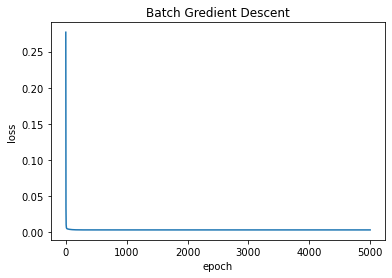

In [147]:
plt.plot(rg.epoch_track,rg.cost_track)
plt.title("Batch Gredient Descent")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [148]:
rg=reg_NN()
rg.stocastic_batch_gredient_descent(regx_scaled,regy_scaled,5000)

 loss = 0.004087097611736301
 loss = 0.02575985110430153
 loss = 0.025459687274376464
 loss = 0.0251630210713533
 loss = 0.003836703328301449
 loss = 0.0038121045119248373
 loss = 0.003787663409587259
 loss = 0.02465255926207829
 loss = 0.0243652980325594
 loss = 0.003621569963888191
 loss = 0.003598350463510625
 loss = 0.003575279833732563
 loss = 0.003552357120078393
 loss = 0.003529581374142154
 loss = 0.0035069516536627675
 loss = 0.023668851654278806
 loss = 0.02339305296067769
 loss = 0.02312046797549347
 loss = 0.0032855023187480384
 loss = 0.02278652030263861
 loss = 0.022521002881260486
 loss = 0.0031374992362297126
 loss = 0.0031173833292409267
 loss = 0.0221343739655442
 loss = 0.003035986531356387
 loss = 0.0030165214675955715
 loss = 0.021755328015423174
 loss = 0.02150182644994425
 loss = 0.0028783573443316585
 loss = 0.02119302262464407
 loss = 0.020946073271988525
 loss = 0.020702001455333446
 loss = 0.0026894488570485034
 loss = 0.002672205600848124
 loss = 0.020350514

 loss = 0.0002800760808957877
 loss = 0.00027681252521823444
 loss = 0.00027358699767751854
 loss = 0.000508105879793876
 loss = 0.00027316894540691493
 loss = 0.0005076200117324085
 loss = 0.000272752325841727
 loss = 0.0005071338186087214
 loss = 0.0002723371283680551
 loss = 0.00026916374994675004
 loss = 0.0005094036026361877
 loss = 0.0002687783292507281
 loss = 0.000508890522094153
 loss = 0.0005056277979649867
 loss = 0.0002711469192135236
 loss = 0.0005051407930501113
 loss = 0.00027073687333320837
 loss = 0.0002675821417722228
 loss = 0.0002644641703452316
 loss = 0.0005101303763705211
 loss = 0.00026411140099690737
 loss = 0.0005095905423745924
 loss = 0.0005063233301025177
 loss = 0.00026649042294735225
 loss = 0.0002633851726233467
 loss = 0.0005085342074083924
 loss = 0.0005052737677864642
 loss = 0.0002657595086360103
 loss = 0.0005047605370150927
 loss = 0.00026538383001878813
 loss = 0.0005042472844415988
 loss = 0.000265009223598765
 loss = 0.0005037340155063309
 loss 

 loss = 0.000326975018721634
 loss = 0.00032487863603819197
 loss = 0.0003227956941989214
 loss = 0.00014114150035361494
 loss = 0.0003223139441790524
 loss = 0.00014108184927934492
 loss = 0.00013943790856857925
 loss = 0.00013781312369733756
 loss = 0.000324990231322706
 loss = 0.0003229065739945909
 loss = 0.00013935669732153367
 loss = 0.00013773285874245543
 loss = 0.00032398694042625977
 loss = 0.0003219097156423323
 loss = 0.0001392715641187324
 loss = 0.00013764871751903007
 loss = 0.00032299065484612914
 loss = 0.00013761173414842998
 loss = 0.00032248812269784327
 loss = 0.00032042050750064207
 loss = 0.00031836614871078495
 loss = 0.00031632496132548405
 loss = 0.0003142968609067722
 loss = 0.0001438740238632362
 loss = 0.000313863697613577
 loss = 0.00031185137745199493
 loss = 0.0001453592275035465
 loss = 0.00014366544511328435
 loss = 0.00014199139932778962
 loss = 0.0003145878804702586
 loss = 0.00031257091725571694
 loss = 0.00014348154206434026
 loss = 0.0001418096391

 loss = 8.073883255732992e-05
 loss = 7.979803218103332e-05
 loss = 7.886819439027013e-05
 loss = 0.00016749016681491207
 loss = 0.00016641631264671672
 loss = 7.965908822697765e-05
 loss = 7.873086947041372e-05
 loss = 0.00016705964150777464
 loss = 0.00016598854763521734
 loss = 7.95196732265859e-05
 loss = 7.859307899492403e-05
 loss = 7.767728178779619e-05
 loss = 7.677215582177606e-05
 loss = 0.00016832627641863955
 loss = 7.67222938261309e-05
 loss = 0.00016809246252000456
 loss = 7.667215092994037e-05
 loss = 7.577873713236103e-05
 loss = 7.48957337365131e-05
 loss = 0.00016953988144363744
 loss = 0.00016845288564346146
 loss = 7.569975733470792e-05
 loss = 0.00016821291572254897
 loss = 0.00016713442769126233
 loss = 7.649669159491816e-05
 loss = 0.00016690401974998976
 loss = 0.00016583392363398017
 loss = 7.728649008668035e-05
 loss = 7.638591777997915e-05
 loss = 7.54958392881272e-05
 loss = 7.461613234512406e-05
 loss = 7.374667608308904e-05
 loss = 7.288735103425614e-05
 l

 loss = 8.336764838221747e-05
 loss = 3.813948441997894e-05
 loss = 8.325262306260788e-05
 loss = 3.811378196792232e-05
 loss = 8.313790464178574e-05
 loss = 8.260487045320308e-05
 loss = 8.20752537834718e-05
 loss = 3.892736461976554e-05
 loss = 3.8473767789496236e-05
 loss = 8.23886564053272e-05
 loss = 8.186042598141904e-05
 loss = 3.8863082525960516e-05
 loss = 3.841023473415035e-05
 loss = 3.796266369932335e-05
 loss = 3.752030794153684e-05
 loss = 8.300570300230082e-05
 loss = 8.247351641535984e-05
 loss = 8.194474191475859e-05
 loss = 3.8330055585422896e-05
 loss = 3.78834188268453e-05
 loss = 8.225183731531361e-05
 loss = 8.172448409974862e-05
 loss = 3.8272502226333616e-05
 loss = 3.7826536107049074e-05
 loss = 3.738576655156768e-05
 loss = 3.6950133015044444e-05
 loss = 8.285646020806599e-05
 loss = 8.232523048430038e-05
 loss = 8.179740671118668e-05
 loss = 8.127296705147986e-05
 loss = 3.816999500931504e-05
 loss = 8.116624076754571e-05
 loss = 8.064584779431087e-05
 loss =

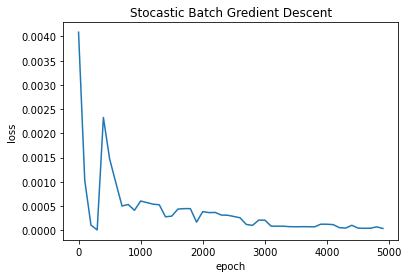

In [149]:
plt.plot(rg.epoch_track,rg.cost_track)
plt.title("Stocastic Batch Gredient Descent")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [154]:
rg=reg_NN()
rg.mini_batch_gredient_desent(regx_scaled,regy_scaled,5000)

 loss = 0.29923486577658676
 loss = 0.2896887336366957
 loss = 0.38379897013047304
 loss = 0.2689851620246979
 loss = 0.35786356004056824
 loss = 0.2497990522484343
 loss = 0.15006130158362546
 loss = 0.1462443479168906
 loss = 0.1425360271850253
 loss = 0.31353753942233076
 loss = 0.21700019124810613
 loss = 0.1278687720752625
 loss = 0.2866382915361352
 loss = 0.19727690206929932
 loss = 0.19114422388400704
 loss = 0.259730857938475
 loss = 0.17768547537238372
 loss = 0.24251199232451778
 loss = 0.23321809179131409
 loss = 0.15851992506198292
 loss = 0.02533641412835543
 loss = 0.15209863615042557
 loss = 0.023158774977390384
 loss = 0.08428325837958456
 loss = 0.14306144360933498
 loss = 0.13874187776692665
 loss = 0.19241388335941967
 loss = 0.1291556198352867
 loss = 0.12529905989831844
 loss = 0.06827793937995537
 loss = 0.17171786208855544
 loss = 0.0637074796545659
 loss = 0.062308150875478044
 loss = 0.11019736321039351
 loss = 0.05890142761136044
 loss = 0.10499444730087694
 

 loss = 0.0028336275587887774
 loss = 0.002160747207364918
 loss = 0.00206092104390624
 loss = 0.002388479768867608
 loss = 0.003249288716454992
 loss = 0.002376320862382343
 loss = 0.0027923016949242376
 loss = 0.0032283457004254248
 loss = 0.0031994648429662467
 loss = 0.0027724354729267327
 loss = 0.0031649416269365007
 loss = 0.002382197239298761
 loss = 0.0031525926927999477
 loss = 0.002746998976063771
 loss = 0.0034977469194883717
 loss = 0.0027356293565852633
 loss = 0.0030666991809135897
 loss = 0.003358511866933274
 loss = 0.002720951947135904
 loss = 0.002714312256069275
 loss = 0.002707700911384621
 loss = 0.002701117407600118
 loss = 0.0026945612552049117
 loss = 0.002688031980124281
 loss = 0.0026815291232029316
 loss = 0.002675052239705604
 loss = 0.0029603010838631432
 loss = 0.002936477966580542
 loss = 0.0026597696556461686
 loss = 0.002141497577313575
 loss = 0.0026427855577095746
 loss = 0.002636462844895652
 loss = 0.002327055153701827
 loss = 0.0022975303896800993

 loss = 0.0010094450840343616
 loss = 0.0008459106574438373
 loss = 0.0008439602960343803
 loss = 0.0008420146572624995
 loss = 0.0006878164401731474
 loss = 0.0009967502218787788
 loss = 0.0008361961455852676
 loss = 0.0006837163735343978
 loss = 0.0006766372428109685
 loss = 0.0006698093639536196
 loss = 0.000663222825049829
 loss = 0.0006568681068344079
 loss = 0.0010062719438654407
 loss = 0.0006548981548319217
 loss = 0.0008245686024631518
 loss = 0.0006478032863685482
 loss = 0.0010015271577333798
 loss = 0.0006459555551303798
 loss = 0.00046222349238659606
 loss = 0.0010067438085104203
 loss = 0.0006334684296916378
 loss = 0.0006278988057040644
 loss = 0.0010042856548360991
 loss = 0.0006264349180569836
 loss = 0.0008094025099716206
 loss = 0.00118161002490333
 loss = 0.0008031292220923799
 loss = 0.0006280864381122438
 loss = 0.0006224096960701571
 loss = 0.000799580386762069
 loss = 0.0006161808387982101
 loss = 0.0007969074656726113
 loss = 0.0007949435463981169
 loss = 0.000

 loss = 0.00015195295613098985
 loss = 0.00015160379454513551
 loss = 0.0001770981064015274
 loss = 0.00017547430633013493
 loss = 0.00015046215946709182
 loss = 0.00015011591766802025
 loss = 0.00012639923307637138
 loss = 0.00014946487886414035
 loss = 0.00017355789051247015
 loss = 0.00017198905477906537
 loss = 0.00012629359266130402
 loss = 0.000101629614802781
 loss = 0.00014781258381840891
 loss = 0.00017284048735446118
 loss = 0.00014707249276074775
 loss = 0.000170863453247646
 loss = 0.00010043440173803357
 loss = 0.00017128133473122873
 loss = 0.00014572179293516457
 loss = 0.00016932110497678722
 loss = 0.00014501165408611392
 loss = 0.0001446780940117883
 loss = 0.00014434531535972766
 loss = 0.00012132986257403931
 loss = 0.00014372333619559478
 loss = 0.00011969412162487916
 loss = 9.365271941568506e-05
 loss = 0.00011614988245287232
 loss = 0.00014276050938045662
 loss = 0.0001424285076923304
 loss = 0.00014209740534533284
 loss = 0.00014176719567642764
 loss = 0.000196

 loss = 3.0858158949245145e-05
 loss = 2.5482518402991694e-05
 loss = 3.6255684245520945e-05
 loss = 2.537387950853343e-05
 loss = 3.059183113150667e-05
 loss = 3.052137683946673e-05
 loss = 2.500014266540147e-05
 loss = 4.172404653385383e-05
 loss = 1.9929081322238726e-05
 loss = 3.0260329764045374e-05
 loss = 3.0190410187903504e-05
 loss = 2.4538867675223064e-05
 loss = 3.0074602537228855e-05
 loss = 1.8485051744737943e-05
 loss = 2.9992861522297133e-05
 loss = 1.762632935278532e-05
 loss = 2.3367853177934343e-05
 loss = 2.989323427954752e-05
 loss = 2.982074237548912e-05
 loss = 2.9748545588610572e-05
 loss = 2.9676638916277183e-05
 loss = 2.9605017512780707e-05
 loss = 2.9533676684102503e-05
 loss = 2.2979264542100185e-05
 loss = 2.9432997440098834e-05
 loss = 3.597645776993197e-05
 loss = 2.925009465100838e-05
 loss = 3.5501221794446325e-05
 loss = 1.693507796490091e-05
 loss = 2.9079496444980526e-05
 loss = 3.5432306509376964e-05
 loss = 2.273018075890726e-05
 loss = 3.5217627980

 loss = 4.792341826164504e-06
 loss = 4.198024625483326e-06
 loss = 4.768036136067336e-06
 loss = 4.1333017682330005e-06
 loss = 4.7448672045211185e-06
 loss = 4.071638172894874e-06
 loss = 4.722730581428532e-06
 loss = 4.711826023056142e-06
 loss = 5.399674189187808e-06
 loss = 3.365546066038751e-06
 loss = 4.679803598494867e-06
 loss = 4.669038864300809e-06
 loss = 5.391185369782304e-06
 loss = 4.646865809290283e-06
 loss = 5.332009038442248e-06
 loss = 3.965508533048944e-06
 loss = 5.310412556408957e-06
 loss = 5.263693797061672e-06
 loss = 3.969284776204477e-06
 loss = 5.243276592803497e-06
 loss = 4.572309799562351e-06
 loss = 4.561667420789479e-06
 loss = 5.177898774319689e-06
 loss = 5.7257936662523125e-06
 loss = 4.011600025926977e-06
 loss = 5.082013031034746e-06
 loss = 5.039775614721309e-06
 loss = 4.0104824657669276e-06
 loss = 4.491130754820665e-06
 loss = 4.480461469846508e-06
 loss = 4.46982855320154e-06
 loss = 4.459231522493162e-06
 loss = 4.448669909850192e-06
 loss =

 loss = 9.116915675960707e-07
 loss = 1.023873956981709e-06
 loss = 8.9714999930749e-07
 loss = 1.018675088453049e-06
 loss = 8.833061956849877e-07
 loss = 8.725841381527691e-07
 loss = 8.62251436601351e-07
 loss = 1.0090978735367673e-06
 loss = 1.1633975257534104e-06
 loss = 1.0043348641252596e-06
 loss = 1.002015942197901e-06
 loss = 8.510822806857222e-07
 loss = 8.412909363212619e-07
 loss = 1.159146383139181e-06
 loss = 9.929333321668475e-07
 loss = 1.146167224951148e-06
 loss = 9.882235589946278e-07
 loss = 8.382885310020773e-07
 loss = 9.838156529849272e-07
 loss = 1.1364719645684832e-06
 loss = 8.319448988051474e-07
 loss = 1.131642115052472e-06
 loss = 9.746191965505735e-07
 loss = 9.72371945532213e-07
 loss = 1.116847607976784e-06
 loss = 9.67849607129256e-07
 loss = 1.1047991469250772e-06
 loss = 1.0952131854188612e-06
 loss = 9.614152007551819e-07
 loss = 8.344419080217203e-07
 loss = 1.0891520301881594e-06
 loss = 1.0798154875573203e-06
 loss = 1.0707027754939144e-06
 loss 

 loss = 2.348139092778518e-07
 loss = 2.0074131878099376e-07
 loss = 2.6907692824586264e-07
 loss = 3.0022976502425657e-07
 loss = 1.728661417052475e-07
 loss = 2.657030076246732e-07
 loss = 2.315744252765101e-07
 loss = 2.3103570415772306e-07
 loss = 2.3049844816842145e-07
 loss = 2.618765223287846e-07
 loss = 1.6914709415221497e-07
 loss = 1.9510676399945834e-07
 loss = 2.639004831131096e-07
 loss = 2.2782391638395024e-07
 loss = 2.6101839715902996e-07
 loss = 2.2677450464579337e-07
 loss = 2.5822565684408e-07
 loss = 1.9550858449941828e-07
 loss = 2.251968705061229e-07
 loss = 2.2467498894654182e-07
 loss = 2.56217839235879e-07
 loss = 1.9331586721315518e-07
 loss = 2.2311397997665315e-07
 loss = 2.2259751794949825e-07
 loss = 2.2208237493120925e-07
 loss = 1.894438260156322e-07
 loss = 2.2107015702682839e-07
 loss = 1.867609040610191e-07
 loss = 1.846429828158146e-07
 loss = 2.196706088121039e-07
 loss = 1.8218955886794985e-07
 loss = 2.1876888338552383e-07
 loss = 1.79843951996702

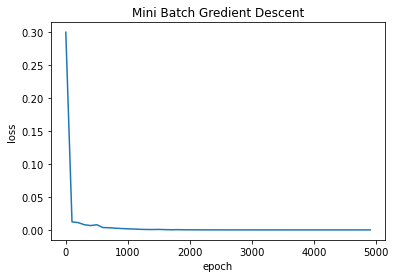

In [155]:
plt.plot(rg.epoch_track,rg.cost_track)
plt.title("Mini Batch Gredient Descent")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()